## GOAL :


- Is good rating correlated with the salary offered? 
- Is there any difference in salaries between the cities? 
- Is there any difference in salaries between the industries? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
#%matplotlib notebook

In [2]:
good_jobs = pd.read_csv('good job.csv', index_col=0)

In [3]:
good_jobs.reset_index(drop=True, inplace=True)

In [4]:
good_jobs

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply,Min Salary,Max Salary
0,Junior Data Analyst,59-85 (),Job Description\nJob description\nInterpret da...,5.0,"['Staffigo Technical Services, LLC', '5.0']","New York, NY","Woodridge, IL",51 to 200 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,59,85 ()
1,Data Analyst with Rochade,59-85 (),"Hi, Trust Yoursquore Doing Good. Enclosed is t...",4.0,"['Reliable Software Resources', '4.0']","New York, NY","Northville, MI",501 to 1000 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,59,85 ()
2,Advertising Data Analyst,59-85 (),Advertising Data Analyst\n\nHearst Television ...,4.3,"['Hearst Television, Inc', '4.3']","New York, NY","Cincinnati, OH",51 to 200 employees,Company - Private,TV Broadcast & Cable Networks,Media,$5 to $10 million (USD),False,59,85 ()
3,Senior Data Analyst,59-85 (),"At Rockstar Games, we create the games we woul...",4.1,"['Rockstar Games', '4.1']","New York, NY","New York, NY",1001 to 5000 employees,Subsidiary or Business Segment,Video Games,Media,$10 to $25 million (USD),False,59,85 ()
4,Data Analyst,59-85 (),Job Description\nPrimary Responsibilities: Exp...,4.2,"['Precision technologies corp', '4.2']","New York, NY","New Brunswick, NJ",201 to 500 employees,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),False,59,85 ()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Data Analyst Junior,57-100 (),Job Description\nJob description\nInterpret da...,5.0,"['Staffigo Technical Services, LLC', '5.0']","Denver, CO","Woodridge, IL",51 to 200 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,57,100 ()
127,Data Security Analyst,57-100 (),Title: Data Security Analyst\nLocation: Denver...,4.3,"['22nd Century Staffing', '4.3']","Denver, CO","McLean, VA",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),True,57,100 ()
128,Data Security Analyst,57-100 (),"Role: Data Security Analyst\nLocation: Denver,...",4.1,"['Mavensoft Technologies, LLC.', '4.1']","Denver, CO","Beaverton, OR",1 to 50 employees,Company - Private,IT Services,Information Technology,Less than $1 million (USD),False,57,100 ()
129,Data Analyst - Junior,57-100 (),Job Description\nJob description\nInterpret da...,5.0,"['Staffigo Technical Services, LLC', '5.0']","Denver, CO","Woodridge, IL",51 to 200 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,57,100 ()


In [5]:
good_jobs['Max Salary']=good_jobs['Max Salary'].str.replace(r"\(\)","").astype('int')
good_jobs

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply,Min Salary,Max Salary
0,Junior Data Analyst,59-85 (),Job Description\nJob description\nInterpret da...,5.0,"['Staffigo Technical Services, LLC', '5.0']","New York, NY","Woodridge, IL",51 to 200 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,59,85
1,Data Analyst with Rochade,59-85 (),"Hi, Trust Yoursquore Doing Good. Enclosed is t...",4.0,"['Reliable Software Resources', '4.0']","New York, NY","Northville, MI",501 to 1000 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,59,85
2,Advertising Data Analyst,59-85 (),Advertising Data Analyst\n\nHearst Television ...,4.3,"['Hearst Television, Inc', '4.3']","New York, NY","Cincinnati, OH",51 to 200 employees,Company - Private,TV Broadcast & Cable Networks,Media,$5 to $10 million (USD),False,59,85
3,Senior Data Analyst,59-85 (),"At Rockstar Games, we create the games we woul...",4.1,"['Rockstar Games', '4.1']","New York, NY","New York, NY",1001 to 5000 employees,Subsidiary or Business Segment,Video Games,Media,$10 to $25 million (USD),False,59,85
4,Data Analyst,59-85 (),Job Description\nPrimary Responsibilities: Exp...,4.2,"['Precision technologies corp', '4.2']","New York, NY","New Brunswick, NJ",201 to 500 employees,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),False,59,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Data Analyst Junior,57-100 (),Job Description\nJob description\nInterpret da...,5.0,"['Staffigo Technical Services, LLC', '5.0']","Denver, CO","Woodridge, IL",51 to 200 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,57,100
127,Data Security Analyst,57-100 (),Title: Data Security Analyst\nLocation: Denver...,4.3,"['22nd Century Staffing', '4.3']","Denver, CO","McLean, VA",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),True,57,100
128,Data Security Analyst,57-100 (),"Role: Data Security Analyst\nLocation: Denver,...",4.1,"['Mavensoft Technologies, LLC.', '4.1']","Denver, CO","Beaverton, OR",1 to 50 employees,Company - Private,IT Services,Information Technology,Less than $1 million (USD),False,57,100
129,Data Analyst - Junior,57-100 (),Job Description\nJob description\nInterpret da...,5.0,"['Staffigo Technical Services, LLC', '5.0']","Denver, CO","Woodridge, IL",51 to 200 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,57,100


In [6]:
good_jobs = pd.DataFrame(data= good_jobs)
good_jobs.to_csv('good-job.csv')

### Good cities with their minimum and maximum salaries:

In [7]:
cities = good_jobs.groupby('Location')[['Min Salary','Max Salary']].mean()

In [8]:
cities.reset_index(inplace=True)
new_cities = cities.copy()
cities["Min Salary"] = cities["Max Salary"]
new_cities = pd.concat([new_cities, cities])

In [9]:
new_cities = new_cities.drop(columns = "Max Salary")
new_cities["type"] = ["Min", "Min", "Min", "Min", "Min", "Min", "Max", "Max", "Max", "Max", "Max", "Max"]

In [10]:
new_cities['Salary'] = new_cities['Min Salary']

new_cities

,Location,Min Salary,type,Salary
0,"Denver, CO",57.000000,Min,57.000000
1,"Los Angeles, CA",59.500000,Min,59.500000
2,"New York, NY",75.333333,Min,75.333333
3,"San Diego, CA",66.666667,Min,66.666667
4,"San Francisco, CA",79.921053,Min,79.921053
5,"Seattle, WA",55.000000,Min,55.000000
0,"Denver, CO",82.400000,Max,82.400000
1,"Los Angeles, CA",104.812500,Max,104.812500
2,"New York, NY",110.606061,Max,110.606061
3,"San Diego, CA",123.166667,Max,123.166667


In [11]:
new_cities.drop(['Min Salary'], axis=1)

,Location,type,Salary
0,"Denver, CO",Min,57.000000
1,"Los Angeles, CA",Min,59.500000
2,"New York, NY",Min,75.333333
3,"San Diego, CA",Min,66.666667
4,"San Francisco, CA",Min,79.921053
5,"Seattle, WA",Min,55.000000
0,"Denver, CO",Max,82.400000
1,"Los Angeles, CA",Max,104.812500
2,"New York, NY",Max,110.606061
3,"San Diego, CA",Max,123.166667


Text(0.5, 1.0, 'Good cities with their minimum and maximum salaries')

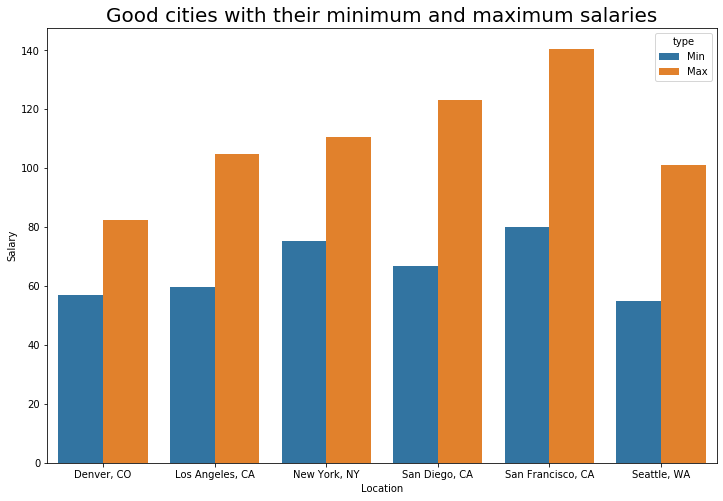

In [12]:
fig5,ax5 = plt.subplots(figsize = (12,8))
sns.barplot(x = new_cities["Location"], y = new_cities['Salary'],hue=new_cities["type"], ax = ax5)
ax5.set_title("Good cities with their minimum and maximum salaries" , fontsize = 20)

### Rating between minimum and maximum salaries

In [13]:
rating = good_jobs.groupby('Rating')[['Min Salary','Max Salary']].mean()
rating.reset_index(inplace=True)
rating

,Rating,Min Salary,Max Salary
0,4.0,72.000000,115.961538
1,4.1,73.941176,132.411765
2,4.2,68.636364,114.454545
3,4.3,66.083333,112.000000
4,4.4,81.250000,128.000000
5,4.5,64.909091,112.818182
6,4.6,63.125000,116.875000
7,4.8,77.400000,121.400000
8,4.9,63.333333,118.333333
9,5.0,69.400000,111.133333


In [14]:
new_rating = rating.copy()
rating["Min Salary"] = rating["Max Salary"]
new_rating = pd.concat([new_rating,rating])


In [15]:
new_rating["type"] = ["Min", "Min", "Min", "Min", "Min", "Min","Min", "Min", "Min","Min", "Max", "Max", "Max", "Max", "Max", "Max","Max", "Max", "Max","Max"]
new_rating.drop(['Max Salary'], axis=1, inplace = True)

new_rating['Salary']= new_rating['Min Salary']
new_rating.drop(['Min Salary'], axis=1)

,Rating,type,Salary
0,4.0,Min,72.000000
1,4.1,Min,73.941176
2,4.2,Min,68.636364
3,4.3,Min,66.083333
4,4.4,Min,81.250000
5,4.5,Min,64.909091
6,4.6,Min,63.125000
7,4.8,Min,77.400000
8,4.9,Min,63.333333
9,5.0,Min,69.400000


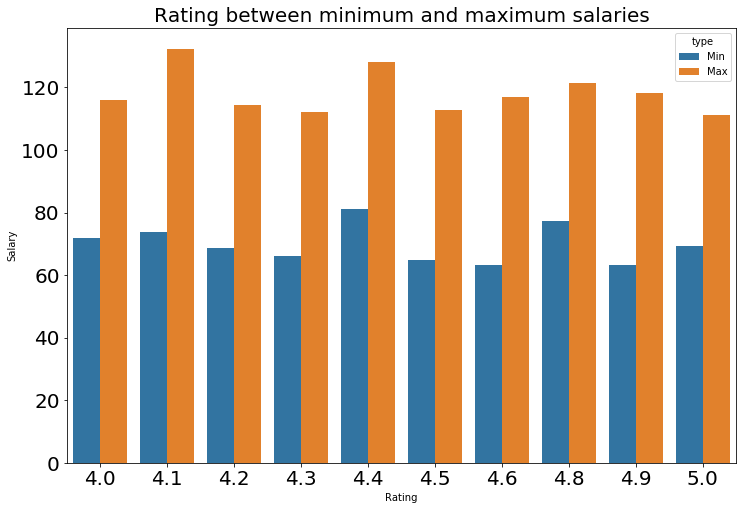

In [16]:
fig2,ax2 = plt.subplots(figsize = (12,8))
sns.barplot(x =new_rating["Rating"], y = new_rating["Salary"],hue=new_rating["type"], ax = ax2)
ax2.set_title("Rating between minimum and maximum salaries" , fontsize = 20)
ax2.tick_params(labelsize = 20)

### Top industries by jobs : 

In [17]:
industries = good_jobs['Sector'].value_counts().nlargest(n=10)

industries

Information Technology        57
Business Services             26
Health Care                   11
Education                      9
Finance                        5
Media                          5
Accounting & Legal             5
Transportation & Logistics     1
Manufacturing                  1
Travel & Tourism               1
Name: Sector, dtype: int64

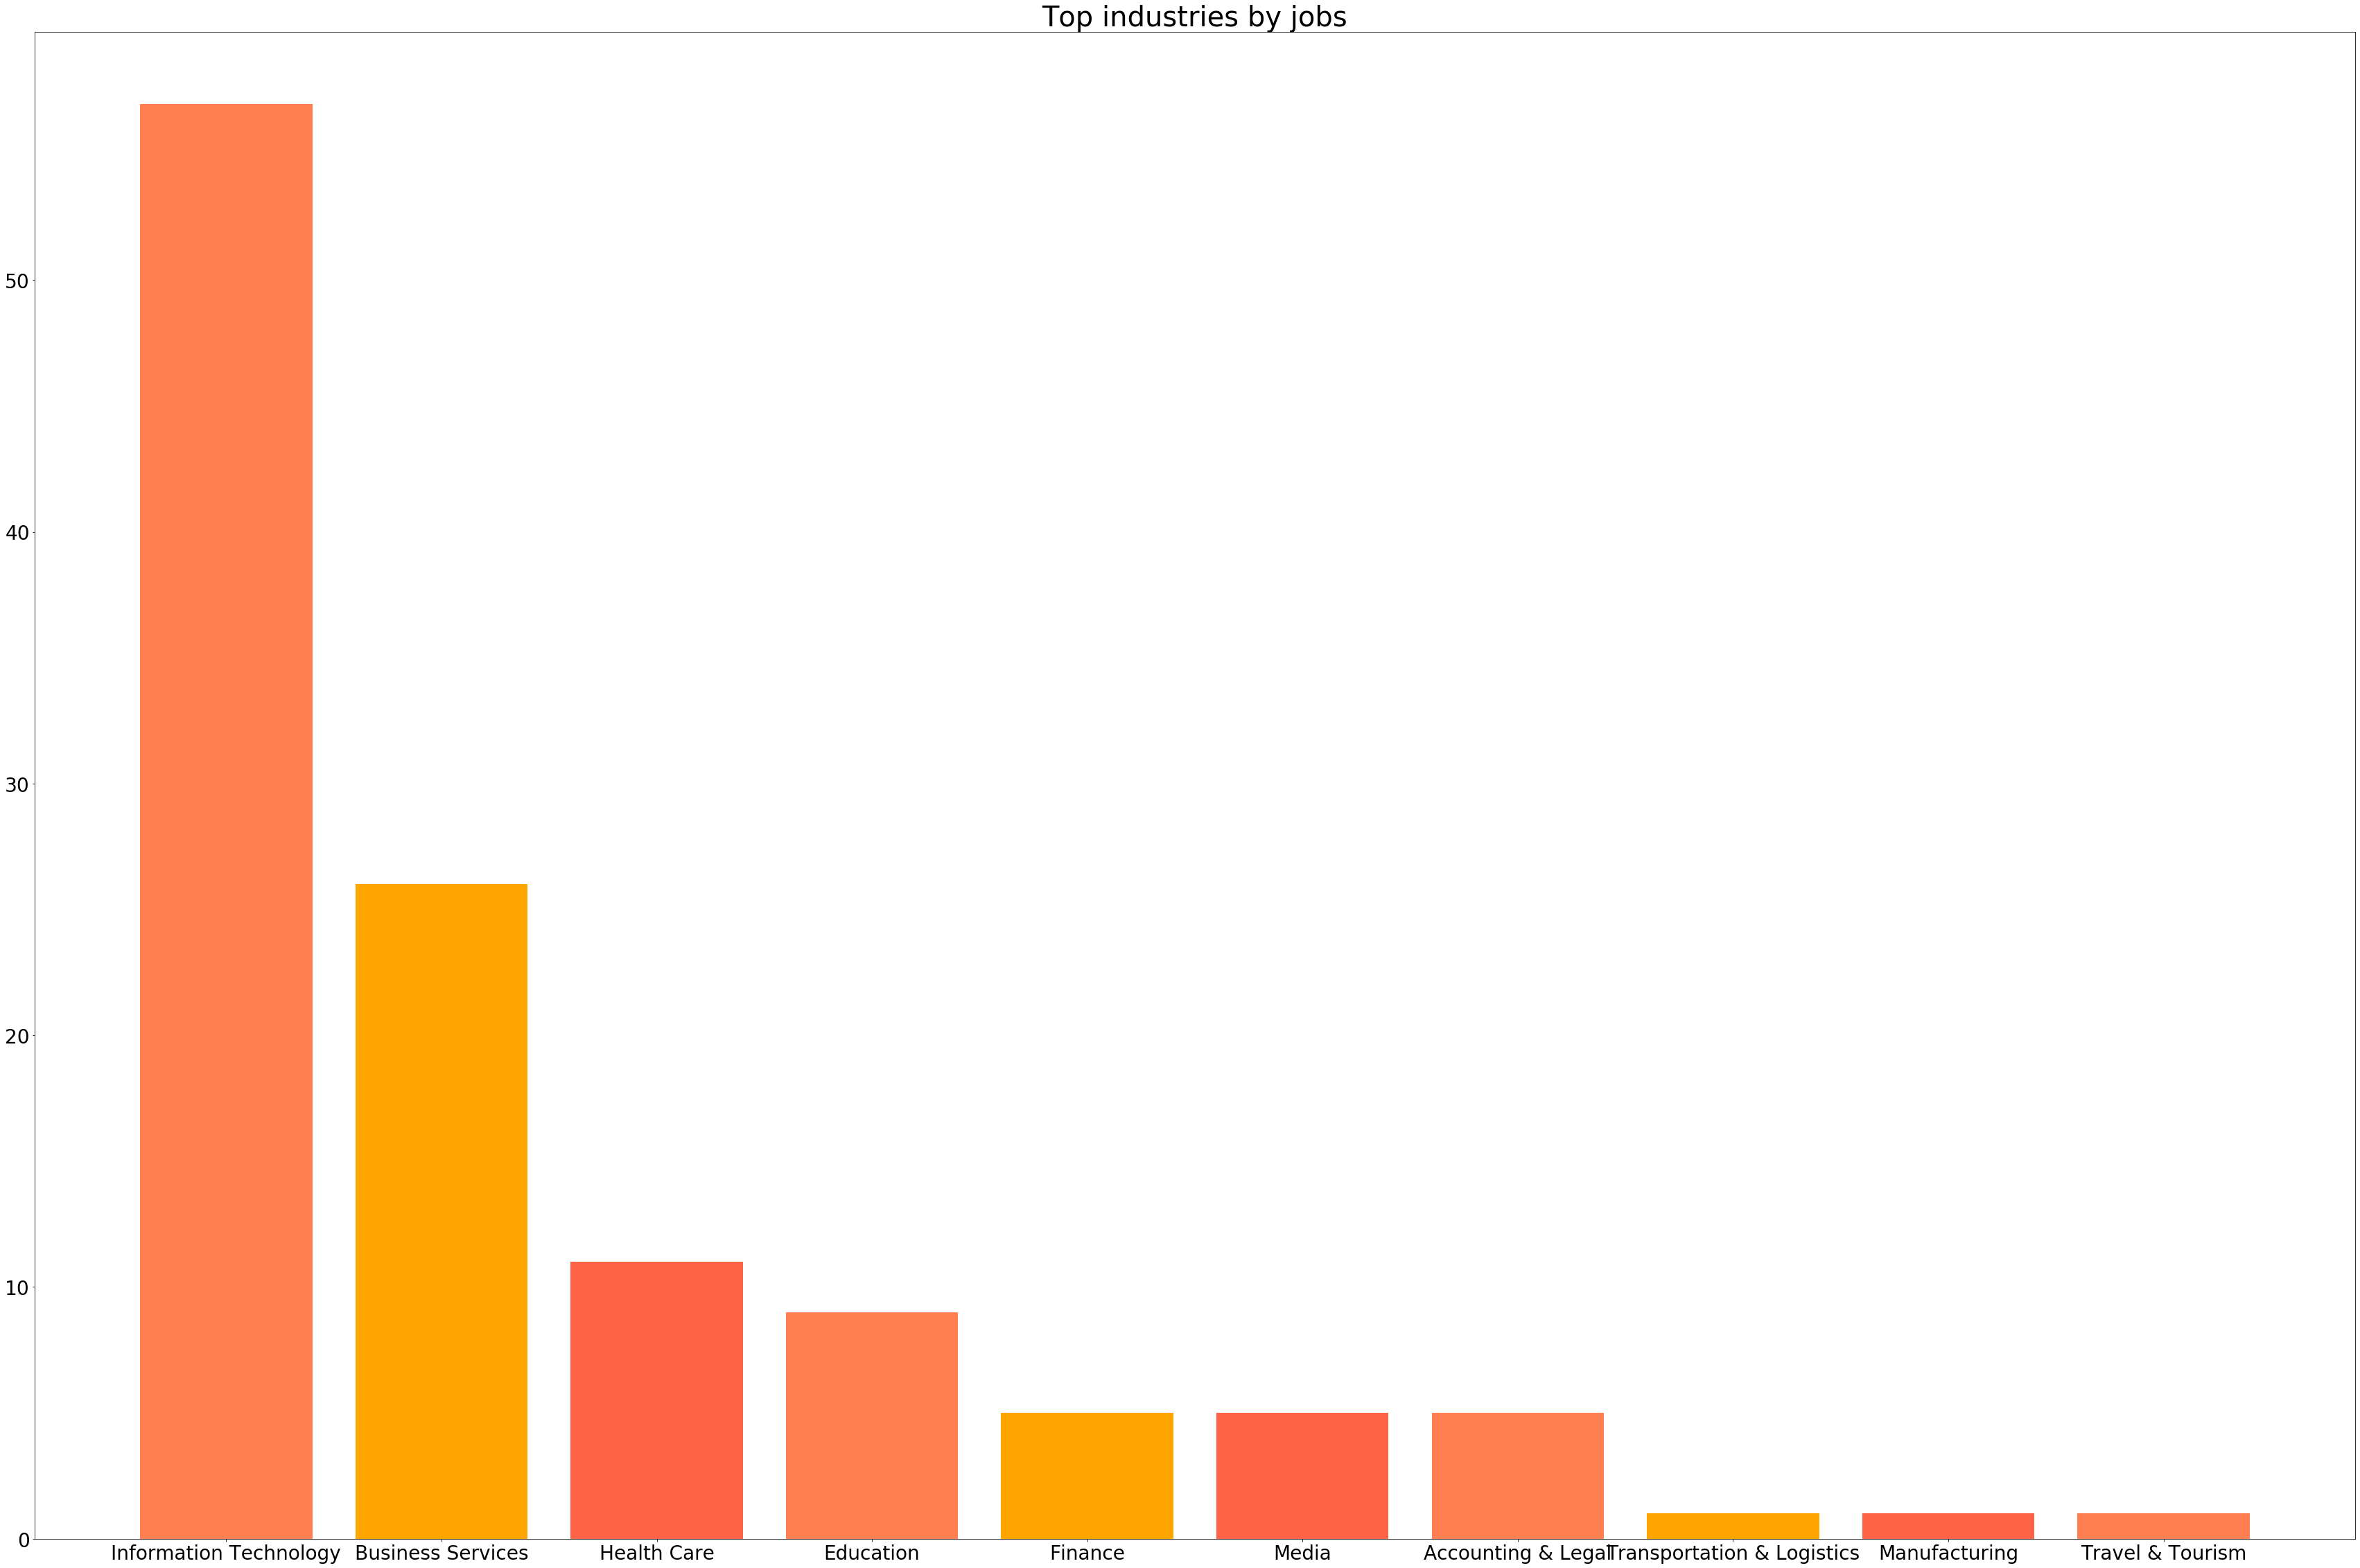

In [18]:
x = industries.index
fig4,ax4 = plt.subplots(figsize = (60,40))
ax4.bar(x,industries, color= ('coral' , 'orange','tomato') )
ax4.set_title("Top industries by jobs" , fontsize = 40)
ax4.tick_params(labelsize = 28)

### Sector between minimum and maximum salaries

In [19]:
sector  = good_jobs.groupby('Sector')[['Min Salary','Max Salary']].mean()
sector.reset_index(inplace=True)

sector

,Sector,Min Salary,Max Salary
0,Accounting & Legal,68.000000,109.000000
1,"Arts, Entertainment & Recreation",73.000000,127.000000
2,Biotech & Pharmaceuticals,76.000000,122.000000
3,Business Services,69.846154,114.884615
4,Education,62.555556,114.333333
5,Finance,87.800000,155.400000
6,Health Care,80.090909,132.636364
7,Information Technology,67.631579,114.491228
8,Manufacturing,99.000000,178.000000
9,Media,57.800000,95.800000


In [20]:
new_sector = sector.copy()
sector["Min Salary"] = sector["Max Salary"]
new_sector = pd.concat([new_sector,sector])

In [21]:
new_sector["type"] = ["Min", "Min", "Min", "Min", "Min", "Min","Min", "Min", "Min","Min", "Min","Min","Max", "Max", "Max", "Max", "Max", "Max","Max", "Max", "Max","Max", "Max","Max"]
new_sector.drop(['Max Salary'], axis=1, inplace = True)

new_sector['Salary']= new_sector['Min Salary']
new_sector.drop(['Min Salary'], axis=1)

,Sector,type,Salary
0,Accounting & Legal,Min,68.000000
1,"Arts, Entertainment & Recreation",Min,73.000000
2,Biotech & Pharmaceuticals,Min,76.000000
3,Business Services,Min,69.846154
4,Education,Min,62.555556
5,Finance,Min,87.800000
6,Health Care,Min,80.090909
7,Information Technology,Min,67.631579
8,Manufacturing,Min,99.000000
9,Media,Min,57.800000


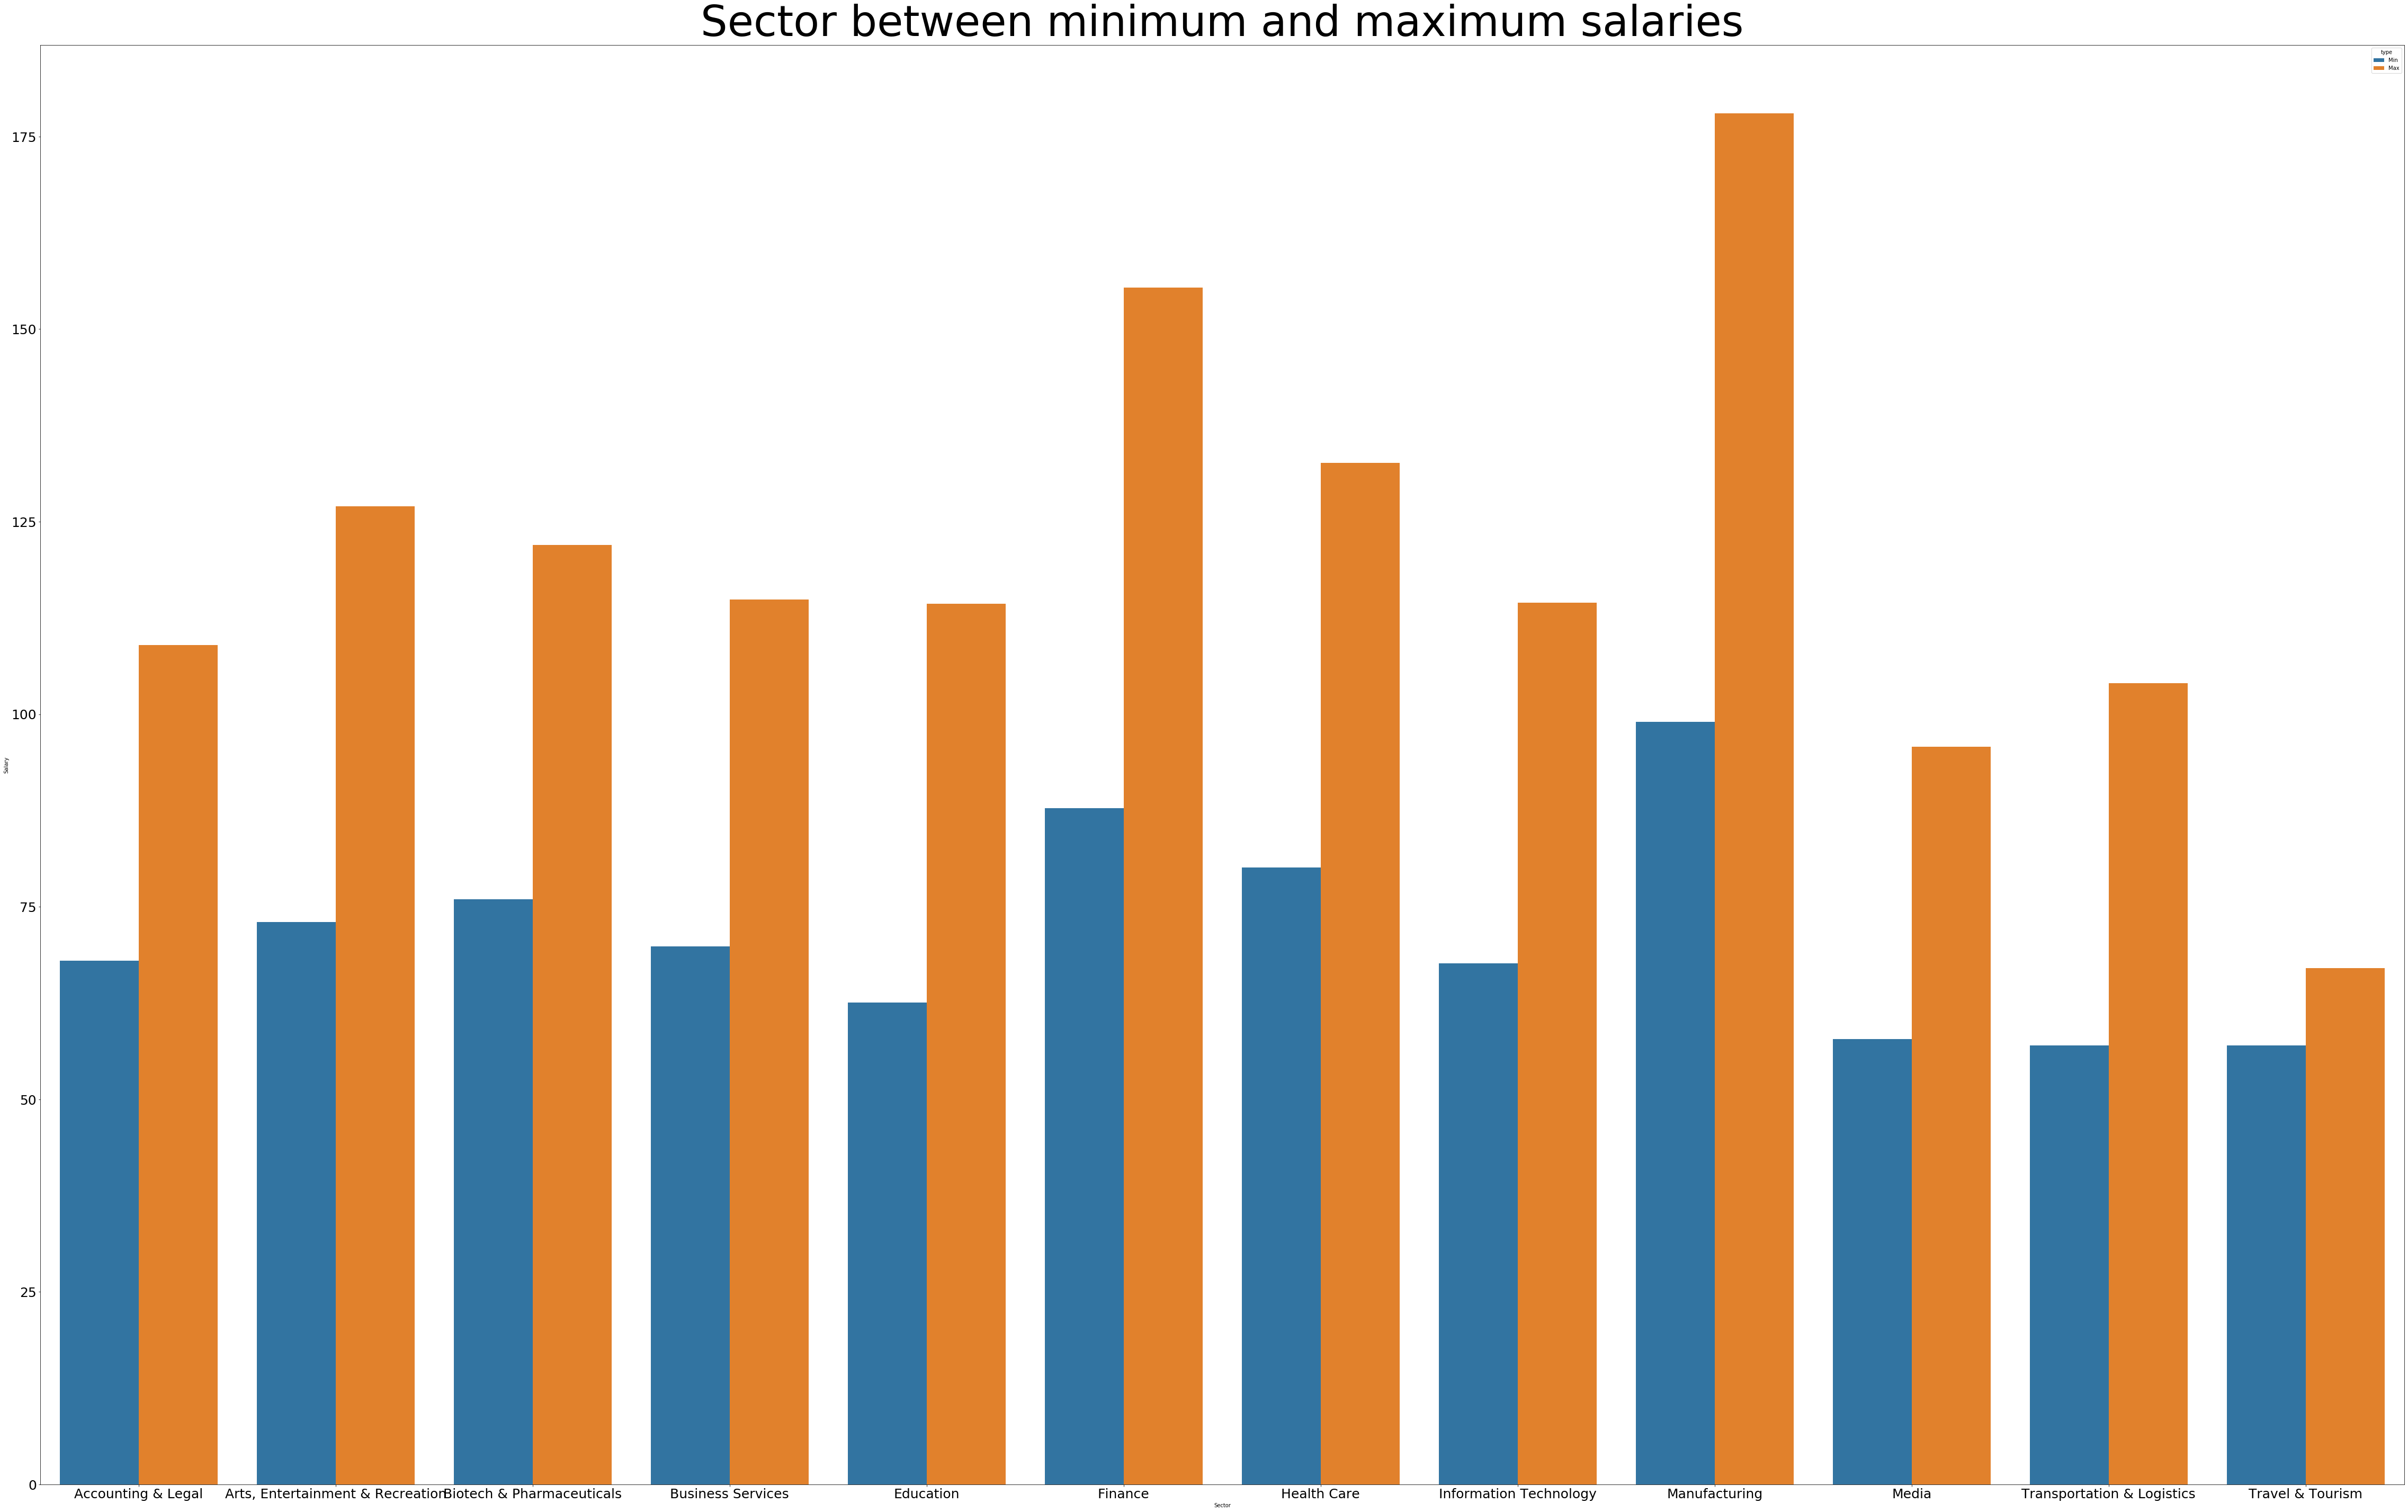

In [22]:
fig6,ax6 = plt.subplots(figsize = (80,50))
sns.barplot(x =new_sector["Sector"], y = new_sector["Salary"],hue=new_sector["type"], ax = ax6)
ax6.set_title("Sector between minimum and maximum salaries" , fontsize = 80)
#matplotlib.rcParams.update({'font.size': 22})
ax6.tick_params(labelsize = 25)